<a href="https://colab.research.google.com/github/najiba1tagiyeva-ai/najiba1tagiyeva-ai.github.io/blob/main/Regional_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 31.2 MB/s eta 0:00:00


Dropdown(description='View:', index=1, options=(('Targeted', 'Targeted'), ('In development (Total)', 'InDevelo…

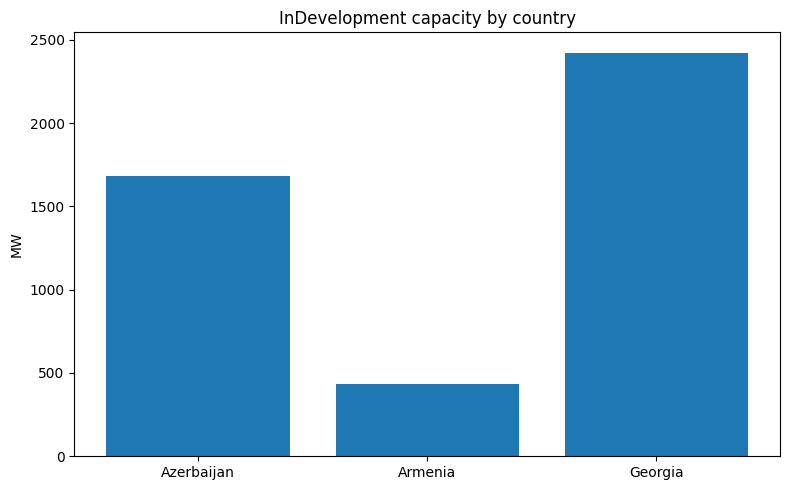

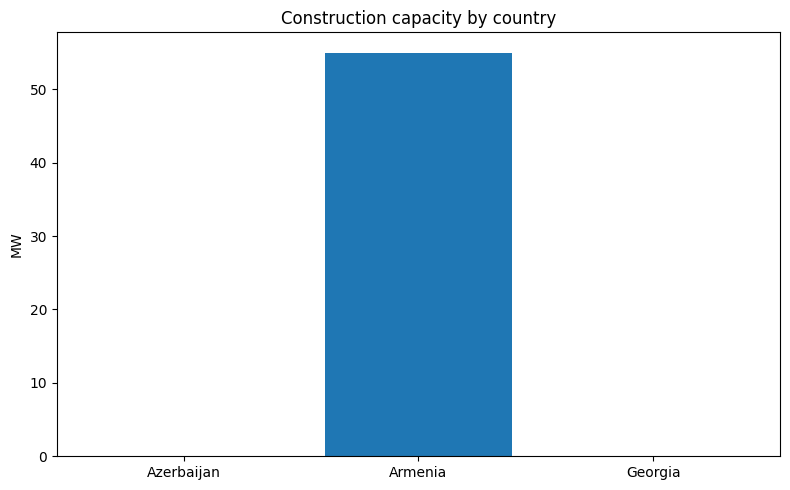

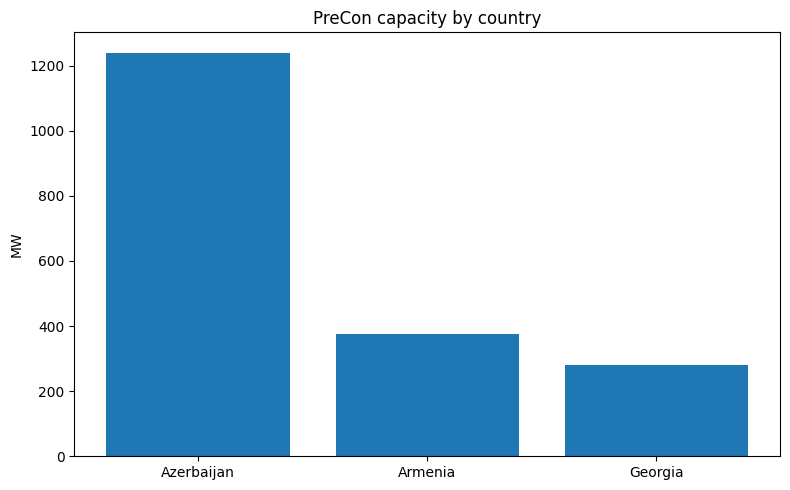

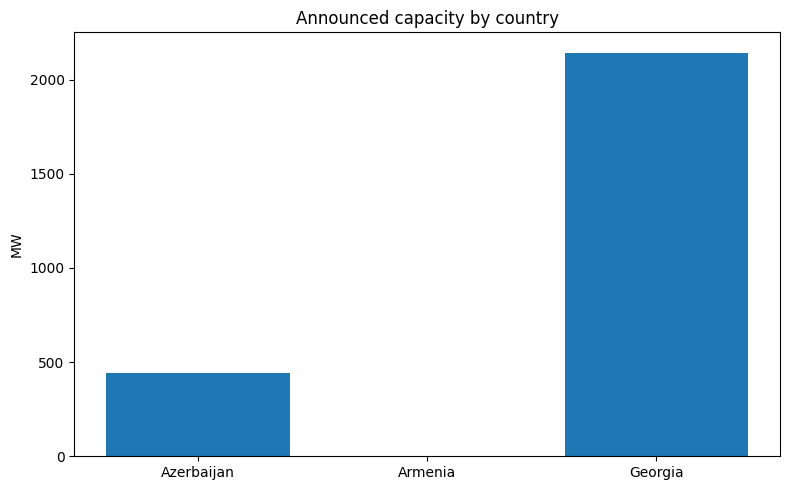

In [23]:
!pip install ipywidgets
from IPython.display import display
import ipywidgets as widgets
import pandas as pd
import matplotlib.pyplot as plt

# ============================
# DATA
# ============================

data = {
    "Country": ["Azerbaijan", "Armenia", "Georgia"],

    #
    "Targeted": [2000, None, None],

    # In development total
    "InDevelopment": [1680, 431, 2424],

    # For future extension (optional)
    "Construction":  [0,   55,   0],
    "PreCon":        [1240, 376, 280],
    "Announced":     [440,   0, 2144]
}

df = pd.DataFrame(data)


# ============================
# DROPDOWN WIDGET
# ============================

mode = widgets.Dropdown(
    options=[
        ("Targeted", "Targeted"),
        ("In development (Total)", "InDevelopment"),
        ("Construction only", "Construction"),
        ("Pre-construction only", "PreCon"),
        ("Announced only", "Announced")
    ],
    value="InDevelopment",
    description="View:",
)


# ============================
# UPDATE FUNCTION
# ============================
def update_chart(change=None):
    plt.figure(figsize=(8,5))
    selected = mode.value

    plt.bar(df["Country"], df[selected])
    plt.title(f"{selected} capacity by country")
    plt.ylabel("MW")
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()


# ============================
# LINK WIDGET & FUNCTION
# ============================
mode.observe(update_chart, names="value")

display(mode)
update_chart()  # initial render


In [27]:
import pandas as pd


data = [
    # AZERBAIJAN
    ["Azerbaijan", "Targeted", 2000],
    ["Azerbaijan", "InDevelopment_Total", 1680],
    ["Azerbaijan", "Construction", 0],
    ["Azerbaijan", "PreConstruction", 1240],
    ["Azerbaijan", "Announced", 440],

    # ARMENIA
    ["Armenia", "Targeted", None],  #
    ["Armenia", "InDevelopment_Total", 431],
    ["Armenia", "Construction", 55],
    ["Armenia", "PreConstruction", 376],
    ["Armenia", "Announced", 0],

    # GEORGIA
    ["Georgia", "Targeted", None],  #
    ["Georgia", "InDevelopment_Total", 2424],
    ["Georgia", "Construction", 0],
    ["Georgia", "PreConstruction", 280],
    ["Georgia", "Announced", 2144],
]

df = pd.DataFrame(data, columns=["Country", "Category", "Capacity_MW"])

# CSV
csv_path = "renewables_full_dataset_comparison.csv"
df.to_csv(csv_path, index=False)

df, csv_path


(       Country             Category  Capacity_MW
 0   Azerbaijan             Targeted       2000.0
 1   Azerbaijan  InDevelopment_Total       1680.0
 2   Azerbaijan         Construction          0.0
 3   Azerbaijan      PreConstruction       1240.0
 4   Azerbaijan            Announced        440.0
 5      Armenia             Targeted          NaN
 6      Armenia  InDevelopment_Total        431.0
 7      Armenia         Construction         55.0
 8      Armenia      PreConstruction        376.0
 9      Armenia            Announced          0.0
 10     Georgia             Targeted          NaN
 11     Georgia  InDevelopment_Total       2424.0
 12     Georgia         Construction          0.0
 13     Georgia      PreConstruction        280.0
 14     Georgia            Announced       2144.0,
 'renewables_full_dataset_comparison.csv')